In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('Pandas l top_movies.csv')

In [4]:
df.head()

,Film,Release year,Director,Production companies,Rank
0,Citizen Kane,1941,Orson Welles,RKO Radio Pictures,1
1,Casablanca,1942,Michael Curtiz,Warner Bros. Pictures,2
2,The Godfather,1972,Francis Ford Coppola,"Paramount Pictures, Alfran Productions",3
3,Gone with the Wind,1939,Victor Fleming,Selznick International Pictures,4
4,Lawrence of Arabia,1962,David Lean,Horizon Pictures,5


In [5]:
df = df.rename(columns={
    'Film': 'Película',
    'Release year': 'Año de estreno',
    'Director': 'Director',
    'Production companies': 'Productoras',
    'Rank': 'Ranking'
})


In [18]:
df.sample(7)

,Película,Año de estreno,Director,Productoras,Ranking,Decada
49,Butch Cassidy and the Sundance Kid,1969,George Roy Hill,Campanile Productions,50,1960
32,High Noon,1952,Fred Zinnemann,Stanley Kramer Productions,33,1950
31,The Godfather Part II,1974,Francis Ford Coppola,The Coppola Company,32,1970
89,The Jazz Singer,1927,Alan Crosland,"Warner Bros. Pictures, The Vitaphone Corp.",90,1920
57,Fantasia,1940,Walt Disney,Walt Disney Productions,58,1940
0,Citizen Kane,1941,Orson Welles,RKO Radio Pictures,1,1940
48,Snow White and the Seven Dwarfs,1937,"David Hand, et al.",Walt Disney Productions,49,1930


#**Cantidad de películas por década**

###**Análisis:** 📊

El gráfico de barras muestra que en los años 1970 y 1990, presentan una concentración notable de películas. Esto puede deberse a avances técnicos, cambios en el lenguaje cinematográfico o momentos clave en la industria (como el auge del cine de autor o el cine comercial de alto presupuesto). Las décadas más antiguas, aunque representadas, tienen menos películas, probablemente por la menor producción total y la pérdida o el olvido de obras.


*texto en cursiva*

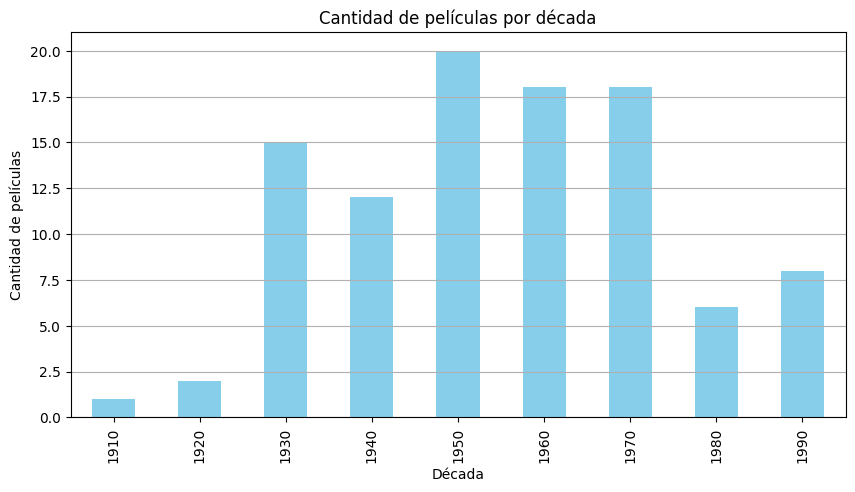

In [6]:
df['Decada'] = (df['Año de estreno'] // 10) * 10
decade_counts = df['Decada'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
decade_counts.plot(kind='bar', color='skyblue')
plt.title('Cantidad de películas por década')
plt.xlabel('Década')
plt.ylabel('Cantidad de películas')
plt.grid(axis='y')
plt.show()


#**Directores con más películas en el ranking**

###**Análisis:** 📊

Este gráfico revela qué directores tienen una presencia dominante en el listado. Si aparecen nombres como Alfred Hitchcock, Steven Spielberg, o Stanley Kubrick, esto indica una valoración constante de sus obras a través del tiempo. La presencia repetida de un director sugiere coherencia en calidad y estilo, y también una fuerte influencia en la historia del cine.

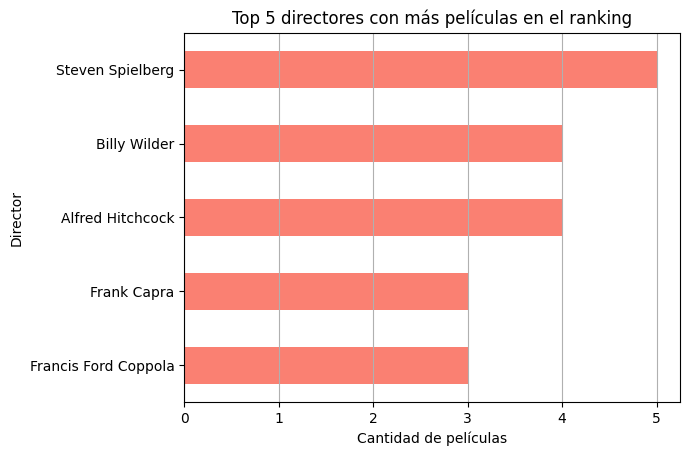

In [9]:
top_directors = df['Director'].value_counts().head(5)

top_directors.plot(kind='barh', color='salmon')
plt.title('Top 5 directores con más películas en el ranking')
plt.xlabel('Cantidad de películas')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()


#**Distribución de películas por compañía productora**

###**Análisis:** 📊

El gráfico de torta muestra que un pequeño grupo de productoras (por ejemplo, Warner Bros., Paramount Pictures) concentra gran parte de las películas del ranking. Esto sugiere que estas compañías han tenido recursos y talento para producir cine de calidad durante décadas, y que existe una cierta centralización del prestigio cinematográfico en pocas manos.

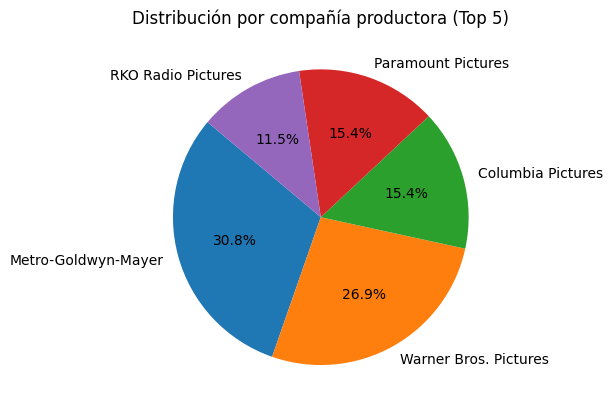

In [10]:
top_companies = df['Productoras'].value_counts().head(5)
top_companies.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribución por compañía productora (Top 5)')
plt.ylabel('')
plt.show()


#**Películas mejor rankeadas por década**

###**Análisis:** 📊

La línea permite ver cómo ha evolucionado el "mejor cine" a lo largo del tiempo. Si se observa que las décadas antiguas (como los 40 o 50) tienen películas mejor posicionadas que décadas recientes, podríamos inferir una cierta nostalgia o valoración histórica en los rankings. Por otro lado, si las películas más recientes tienen buena posición, sugiere que la industria sigue produciendo obras maestras.

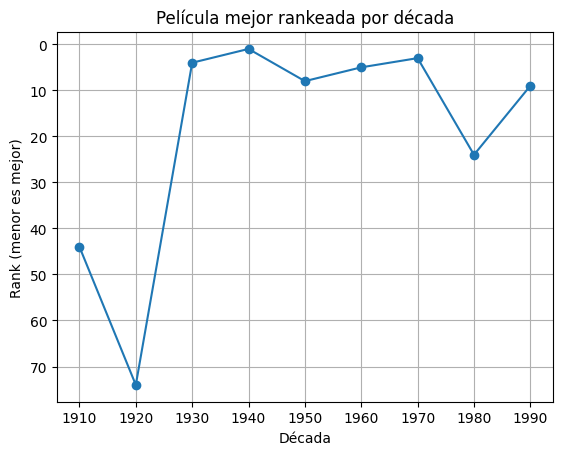

In [14]:
best_per_decade = df.loc[df.groupby('Decada')['Ranking'].idxmin()]
plt.plot(best_per_decade['Decada'], best_per_decade['Ranking'], marker='o')
plt.title('Película mejor rankeada por década')
plt.xlabel('Década')
plt.ylabel('Rank (menor es mejor)')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


#**Número de películas estrenadas por años**

###**Análisis:** 📊

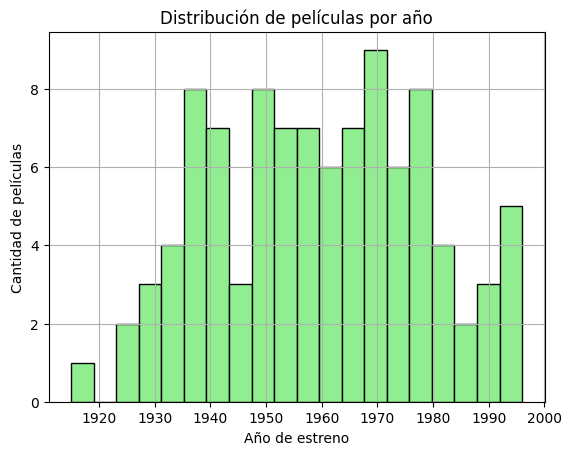

In [17]:
plt.hist(df['Año de estreno'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribución de películas por año')
plt.xlabel('Año de estreno')
plt.ylabel('Cantidad de películas')
plt.grid(True)
plt.show()


#**Conclusiones generales** 🧠



Tras explorar visualmente este dataset, podemos sacar las siguientes conclusiones:

-La producción cinematográfica de calidad no está distribuida uniformemente en el tiempo. Algunas décadas fueron especialmente ricas en obras influyentes.

-Algunos directores y productoras han sido claves para la historia del cine. Su presencia repetida indica una capacidad constante para crear películas memorables.

-El reconocimiento en los rankings puede reflejar no solo la calidad técnica o narrativa, sino también factores culturales, históricos y nostálgicos.

-Los datos permiten ver patrones interesantes, como años especialmente fructíferos, o la evolución del gusto cinematográfico a lo largo del tiempo.

-El cine clásico sigue teniendo un peso importante, lo cual puede reflejar tanto su valor intrínseco como una inclinación del ranking hacia obras establecidas.